# ML Excercise: Fishmarket
In this excercise you will learn how to prepare a dataset for machine learning and train several ML algorithms on the Fishmarket dataset.

We split the excercise into differnt steps:

1. Creating helper Functions for dataset preparation, this includes:

    1. data loading
    2. Cleaning the dataset
    3. Converting categorical values into one-hot-encodings
    4. Extracting the target feature from the rest of the dataframe
    5. Creating and Fitting a scaler on a given dataframe
    6. Normalizing the numerical data
2. Putting Everything together to train a machine learning algorithm to predict the weight of a fish given weight, height and length features
3. Adapting the code to a classifiaction task to predict the species of the fish
4. Weight Prediction using a Neural Network

In [2]:
# All sklearn imports
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, accuracy_score, classification_report
from sklearn.svm import SVR

# matplotlib for plotting
import matplotlib.pyplot as plt

# pandas for dataframes
import pandas as pd

# numpy
import numpy as np

# tensorflow imports for the Neural Network at the end
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

from typing import List, Tuple

## 1. Creating Helper Functions
In this section you will create helper functions that you will need to train the ML algorithm in Step 2.

Every task for a function comes with a short description and some hints.
Additionally we implemnted some simple test functions after each function task to help you find the most serios Errors. Note: The tests are not complete and may pass even though your function might not be compatible with the desired results.

### Function 1: Download the dataset
Task 1: create a function that:
1. Downloads the Fishmarket dataset
2. Converts it to a pandas DataFrame
3. Returns the DataFrame

Make sure that the datatype of the feature 'Species' is 'category'

In [1]:
def load_fish_df() -> pd.DataFrame:
  url = "https://raw.githubusercontent.com/Ankit152/Fish-Market/main/Fish.csv"
  fish_df = None # Override this variable
  # # # # # # # # # #
  # Your Code here  #
  # # # # # # # # # #
  return fish_df

NameError: name 'pd' is not defined

In [ ]:
# Lets test the function here
def test_load_fish_df():
  df = load_fish_df()
  assert(isinstance(df, pd.DataFrame))
  assert(df.shape == (159,7))
  assert(set(df.columns) == {'Height', 'Length1', 'Length2', 'Length3', 'Species', 'Weight', 'Width'})

test_load_fish_df()

### Function 2: Cleaning the datset
Execute the code snippet directly below this text box. Did you find something that doesn't make sense?

---
If you have a look at the min value of "Weight" you see a 0.0. This looks suspicious, since there should not be a fish with no weight at all.

For this reason we should filter broken samples from the dataset.

---

Create a function (see the second code box after this text box) that deletes all samples with a 0.0 entry in any of the features. For this example this is enough, but you can also consider to search for other broken entries like NAN, massive outliers and more.

Make sure that you return a pandas Dataframe

In [ ]:
load_fish_df().describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
def df_clean(df: pd.DataFrame):
  # Find rows with nan and 0 values (since 0 length, height, width and weight doesn't make sense)
  cleaned_df = None # Override this variable
  # # # # # # # # # #
  # Your Code here  #
  # # # # # # # # # #
  return cleaned_df

In [ ]:
# Lets test the function here
def test_df_clean():
  fish_df = load_fish_df()
  cleaned_df = df_clean(fish_df)

  assert(isinstance(cleaned_df, pd.DataFrame))
  assert(cleaned_df.shape == (158,7))
  assert(set(cleaned_df.columns) == {'Height', 'Length1', 'Length2', 'Length3', 'Species', 'Weight', 'Width'})

test_df_clean()

Here you can have a look on some key metrics of the cleaned dataset:

In [ ]:
fish_df = load_fish_df()
cleaned_df = df_clean(fish_df)
cleaned_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### Function 3: Convert categorical values to one hot
Since many machine learning models like Neural Networks can't work with categorical data directly, we need to convert the categorical values to so called one-hot-encodings (See [Explanation of One-Hot-Encodings](https://www.geeksforgeeks.org/ml-one-hot-encoding/)). The resulting dataframe should contain all features of the input dataframe - the categorical features + the categorical feature(s) as one hot

The functions should follow the following steps:
1. Determine all columns (features) that are of datatype 'category'
2. Afterwards convert the categorical features to one-hot (don't touch the numerical features)

Hint: pandas has all functionaly you need.

In [ ]:
def to_one_hot(df: pd.DataFrame) -> pd.DataFrame:
  one_hot_df = None # Override this variable
  # # # # # # # # # #
  # Your Code here  #
  # # # # # # # # # #
  return one_hot_df

In [ ]:
# Lets test the function here
def test_to_one_hot():
  fish_df = load_fish_df()
  cleaned_df = df_clean(fish_df)
  one_hot = to_one_hot(df=cleaned_df)
  assert(isinstance(one_hot, pd.DataFrame))
  assert(one_hot.shape == (158,13))
  assert(set(one_hot.columns) == {'Height',
 'Length1',
 'Length2',
 'Length3',
 'Species_Bream',
 'Species_Parkki',
 'Species_Perch',
 'Species_Pike',
 'Species_Roach',
 'Species_Smelt',
 'Species_Whitefish',
 'Weight',
 'Width'})

test_to_one_hot()

If you now have a look at the one_hot_df, you see that the categorical "Species" feature got expanded to Features "Species_Bream", 	"Species_Parkki", 	"Species_Perch", 	"Species_Pike", 	"Species_Roach", 	"Species_Smelt", 	"Species_Whitefish" all of type 'boolean'

In [ ]:
one_hot_df = to_one_hot(cleaned_df)

one_hot_df

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
155,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,True,False
156,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
157,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,True,False


### Function 4: Splitting input and target features
Create a function that extracts the target feature (here Weight) from the dataframe and returns a feature_df, containing all input features and a target_df, containing the target features.

Make sure that both feature_df and target_df are pandas DataFrames

In [ ]:
# Helper function to split dataframe into feature (X) and target (y) dataframe
def split_X_y(df: pd.DataFrame, target_feature:str) -> Tuple[pd.DataFrame, pd.DataFrame]:
  feature_df = None # Override this variable
  target_df = None # Override this variable
  # # # # # # # # # #
  # Your Code here  #
  # # # # # # # # # #
  return feature_df, target_df

In [ ]:
def test_split_X_y():
  fish_df = load_fish_df()
  feature_df, target_df = split_X_y(fish_df, "Height")

  assert(isinstance(feature_df, pd.DataFrame))
  assert(isinstance(target_df, pd.DataFrame))

  assert(feature_df.shape == (159,6))
  assert(target_df.shape == (159,1))

  assert(set(feature_df.columns) == {'Weight', 'Length1', 'Length2', 'Length3', 'Species', 'Width'})
  assert(set(target_df.columns) == {'Height'})

test_split_X_y()

You can have a look on the results using the two code boxes below:

In [ ]:
fish_df = load_fish_df()
feature_df, target_df = split_X_y(fish_df, "Weight")

feature_df.head()

,Species,Length1,Length2,Length3,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
target_df.head()

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


### Function 5: Create and Fit a Scaler on a dataframe
Write a function that creates scikit StandardScaler and fits it on the numerical features only.

You can solve it using 3 Steps:

1. Create a StandardScaler
2. Extract the numerical features of the input df into a new dataframe
3. Train the scaler on the new dataframe

In [ ]:
def create_fit_scaler(df: pd.DataFrame) -> StandardScaler:
  scaler = # Override this variable
  # # # # # # # # # #
  # Your Code here  #
  # # # # # # # # # #
  return scaler

In [ ]:
def test_create_fit_scaler():
  fish_df = load_fish_df()
  scaler = create_fit_scaler(fish_df)
  assert(isinstance(scaler, StandardScaler))
  assert(set(scaler.feature_names_in_) == {'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'})

  means_sorted = sorted(scaler.mean_)
  ref = sorted([398.32641509, 26.24716981, 28.41572327, 31.22704403, 8.97099371, 4.41748553])
  assert(np.allclose(means_sorted, ref, rtol=1e-05, atol=1e-08)) # If this fails your mean values are not as expected

test_create_fit_scaler()

### Function 6: Use the fitted scalers to normalize data

Here you need to create a function that takes a pandas dataframe and a scaler and then normalized all numerical ('number') features of the dataset using the scaler.

In [ ]:
def normalize_df(df: pd.DataFrame, scaler: StandardScaler) -> pd.DataFrame:
  normalized_df = # Override this variable
  # # # # # # # # # #
  # Your Code here  #
  # # # # # # # # # #

  return normalized_df

In [ ]:
def test_normalize_df():
  fish_df = load_fish_df()
  scaler = create_fit_scaler(fish_df)

  norm_df = normalize_df(fish_df, scaler)
  assert(isinstance(norm_df, pd.DataFrame))

  descr = norm_df.describe().T

  means = descr["mean"].values
  zeros = np.zeros_like(means)

  std = descr["std"].values
  ones = np.ones_like(std)

  assert(np.allclose(means, zeros, atol=1e-08))
  assert(np.allclose(std, ones, atol=1e-02))

test_normalize_df()

You can check out the normalised values of the dataframe below:

In [ ]:

fish_df = load_fish_df()

scaler = create_fit_scaler(fish_df)

normalize_df(fish_df, scaler)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,Bream,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,Bream,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,Bream,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,Bream,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371
...,...,...,...,...,...,...,...
154,Smelt,-1.082039,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
155,Smelt,-1.078676,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547
156,Smelt,-1.082039,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402
157,Smelt,-1.061022,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568


### An Evaluation Function
You don't have to implement this function yourself 🎉

In [ ]:
# A helper function to evaluate the regression performance of the models. It outputs the mean absolue and mean absolute percantage error for both the training and testing sets
def evaluate_and_print(regressor, target_scaler, X_df, y_df):
  pred_normalized = regressor.predict(X_df)
  mae_normalized = mean_absolute_error(y_df, pred_normalized)
  mape_normalized = mean_absolute_percentage_error(y_df, pred_normalized)
  print("MAE of Normalized values:", mae_normalized)
  print("MAPE of Normalized values:", mape_normalized)
  print("- - - - -")

  # Tranform back from normalized to real scale for prediction and target values
  pred = target_scaler.inverse_transform(pd.DataFrame(pred_normalized, columns=y_df.columns))
  y_true = target_scaler.inverse_transform(pd.DataFrame(y_df, columns=y_df.columns))

  mae = mean_absolute_error(y_true, pred)
  mape = mean_absolute_percentage_error(y_true, pred)
  print("MAE:", mae)
  print("MAPE:", mape)


## 2. Creating a Machine Learning Script
Now that you have created all your helper functions you can plug them together to train a machine Learning Model.
The goal is to create a machine learning model that can predict the weight of a fish given all other features (Species, Length1, Length2, Length3, Height, Width)

A rough outline of the script is already given.

In [ ]:
target_feature = "Weight" # Defining the target feature for regression

# Step 1: load the fish dataset
fish_df = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 2: Clean the dataset
cleaned_df = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 3: Split into X and y
X_df = None # Override this variable
y_df = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 4: Shuffle and split the data into training and test sets (test_size=1/4), if possible set a random_state so that you can repeat your experiments
X_train = None # Override this variable
X_test = None # Override this variable
y_train = None # Override this variable
y_test = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 5: Create scaler(s) and train them on the numerical features of the training dataset(s)
feature_scaler = None # Override this variable
target_scaler = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 6: Normalize dataframes using the scalers
X_train = None # Override this variable
y_train = None # Override this variable
X_test = None # Override this variable
y_test = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 7: Convert categorical features to One-Hot-Encodings
X_train = None # Override this variable
X_test = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 8: Initialize a regression model (e.g. DecisionTreeRegressor)
regressor = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 9: Fit the regression model on the training data
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #


# Step 10: Evaluate the model
print("Metrics on the Training Dataset:")
evaluate_and_print(regressor, target_scaler, X_train, y_train)
print("#####################################")
print("Metrics on the Testing Dataset:")
evaluate_and_print(regressor, target_scaler, X_test, y_test)

Metrics on the Training Dataset:
MAE of Normalized values: 0.0533912673794771
MAPE of Normalized values: 0.27932513124327507
- - - - -
MAE: 18.893833736884588
MAPE: 0.0807690893850442
#####################################
Metrics on the Testing Dataset:
MAE of Normalized values: 0.13938163263289075
MAPE of Normalized values: 0.22420420477174258
- - - - -
MAE: 49.32367261904763
MAPE: 0.15702866899042822


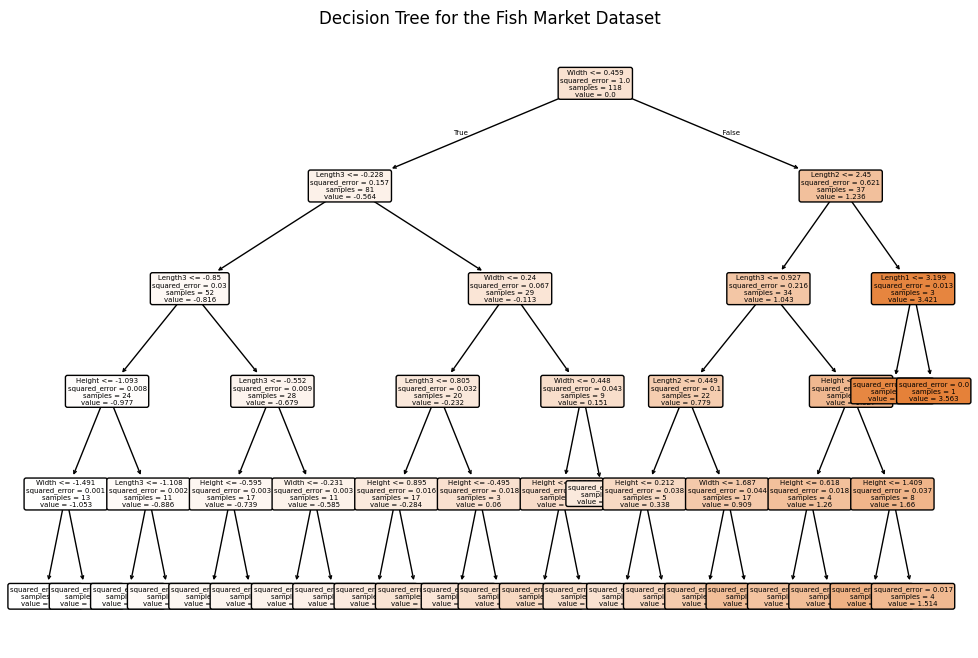

In [ ]:
# Visualize the decision tree
# Visulaization of deep trees get messy
plt.figure(figsize=(12, 8))
plot_tree(
    regressor,
    feature_names=X_train.columns,  # Use the feature names from the dataframe
    filled=True,
    rounded=True,
    fontsize=5
)
plt.title("Decision Tree for the Fish Market Dataset")
plt.show()

## 3. A Classification Problem
Let's adapt the code so that we can predict the species!
Luckily this script is very similar to the one before.

In [ ]:
# A helper function to evaluate the classification performance of the models.
def evaluate_and_print_clf(clf, X_df, y_df):
  y_pred = clf.predict(X_df)
  train_accuracy = accuracy_score(y_df, y_pred)
  print("Accuracy: {:.2f}".format(train_accuracy))
  print("\nClassification Report:\n", classification_report(y_df, y_pred))
  print("- - - - -")

In [ ]:
target_feature = "Species" # Defining the target feature for classification

# Step 1: load the fish dataset
fish_df = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 2: Clean the dataset
cleaned_df = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 3: Split into X and y
X_df = None # Override this variable
y_df = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 4: Shuffle and split the data into training and test sets (test_size=1/4), if possible set a random_state so that you can repeat your experiments
X_train = None # Override this variable
X_test = None # Override this variable
y_train = None # Override this variable
y_test = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 5: Create scaler(s) and train them on the numerical features of the training dataset(s)
feature_scaler = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 6: Normalize dataframes using the scalers
X_train = None # Override this variable
X_test = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Skipping step 7 for DecisionTree, One hot encodings are not needed

# Step 8: Initialize a classification model (e.g. DecisionTreeClassifier)
clf = None # Override this variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 9: Fit the classifiaction model on the training data
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #


# Step 10: Evaluate the model
print("Metrics on the Training Dataset:")
evaluate_and_print_clf(clf, X_train, y_train)
print("#####################################")
print("Metrics on the Testing Dataset:")
evaluate_and_print_clf(clf, X_test, y_test)

Metrics on the Training Dataset:
Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

       Bream       1.00      0.96      0.98        25
      Parkki       0.50      0.70      0.58        10
       Perch       0.69      1.00      0.82        38
        Pike       1.00      1.00      1.00        15
       Roach       0.00      0.00      0.00        15
       Smelt       1.00      1.00      1.00        10
   Whitefish       0.00      0.00      0.00         5

    accuracy                           0.80       118
   macro avg       0.60      0.67      0.63       118
weighted avg       0.69      0.80      0.73       118

- - - - -
#####################################
Metrics on the Testing Dataset:
Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

       Bream       0.88      0.70      0.78        10
      Parkki       0.25      1.00      0.40         1
       Perch       0.75      0.83      0.79    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

#### Bonus Task (Without Solution):
Have a look at the "support" column, this indicates how many samples there are per class. As you see the classes in training dataset are very unbalanced, with very few Whitefish and many Perchs.

- What kind of Problems may arise from this unbalanced dataset?
- What ideas do you have to mitigate this Problem?
- Implement and test your idea

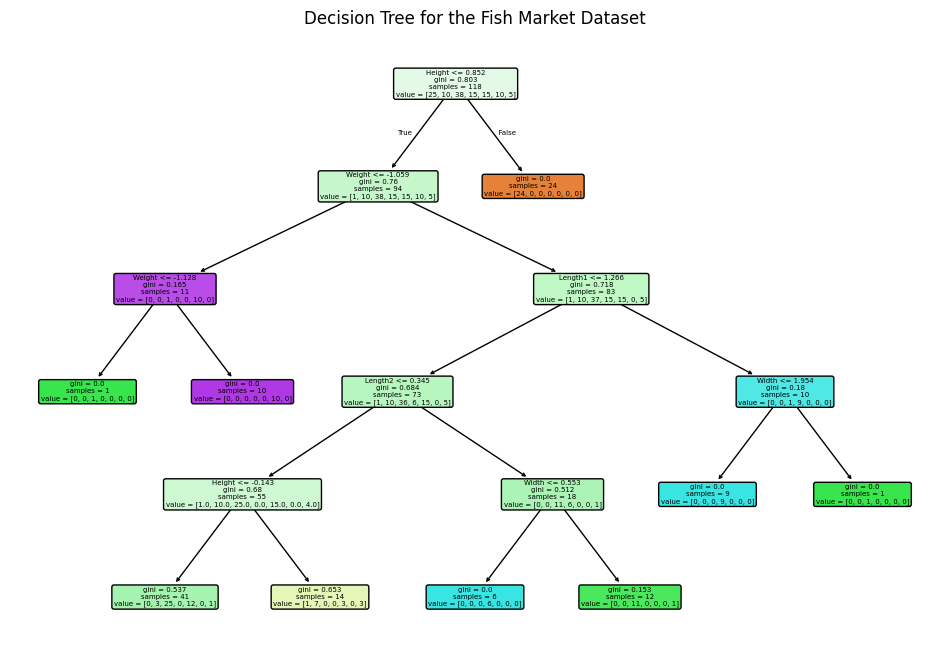

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=X_train.columns,  # Use the feature names from the dataframe
    filled=True,
    rounded=True,
    fontsize=5
)
plt.title("Decision Tree for the Fish Market Dataset")
plt.show()

## 4: Training a Neural Network to Predict the Weight
Let's create a Neural Network using Tensorflow and train it to predict the weight!


In [ ]:
# First we build the model
# Build a Sequential tensorflow model with a total of 4 Dense layers
# Layer 1: Has 12 Input Neurons and Maps to 40 output Neurons. The activation is relu
# Layer 2: Maps to 40 output Neurons. The activation is relu
# Layer 3: Maps to 40 output Neurons. The activation is relu
# Layer 4: Maps to 1 output Neuron. The activation is linear
model = None # Override this Variable
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Compile the model
# Before a Tensorflow model can be used it must be compiled
# Here we can set the optimizer that will be used (adam is a very advanced optimitzer, you can also try out SGD)
# The loss function should be mean_squared_error
# Metrics can be tracked during training, here mean_absolute_error is tracked
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #


# Model summary() gives a short summary of the model
# This way you know how large each layer is and how many (trainable) weights there are
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,001 (11.72 KB)

 Trainable params: 3,001 (11.72 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
target_feature = "Weight" # Defining the target feature for regression

# Step 1-7: Now repeat the steps 1-7 similar to the ones you know from the first regression example
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 8: Fit the regression model on the training data
history = None # Make sure to track the history of the training process, track also the validation MAE and loss
# # # # # # # # # #
# Your Code here  #
# # # # # # # # # #

# Step 10: Evaluate the model
print("Metrics on the Training Dataset:")
evaluate_and_print(model, target_scaler, X_train, y_train)
print("#####################################")
print("Metrics on the Testing Dataset:")
evaluate_and_print(model, target_scaler, X_test, y_test)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.7911 - mean_absolute_error: 0.6522 - val_loss: 0.6707 - val_mean_absolute_error: 0.5687
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4580 - mean_absolute_error: 0.4226 - val_loss: 0.4689 - val_mean_absolute_error: 0.4361
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2792 - mean_absolute_error: 0.2935 - val_loss: 0.2616 - val_mean_absolute_error: 0.3220
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2817 - mean_absolute_error: 0.2978 - val_loss: 0.0875 - val_mean_absolute_error: 0.2161
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1352 - mean_absolute_error: 0.2590 - val_loss: 0.0500 - val_mean_absolute_error: 0.1648
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0590 - mean_absolute_error: 0.1666 - val_loss: 0.0405 - val_mean_absolute_error: 0.1273
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0449 - mean_absolute_error: 0.1317 - val_loss

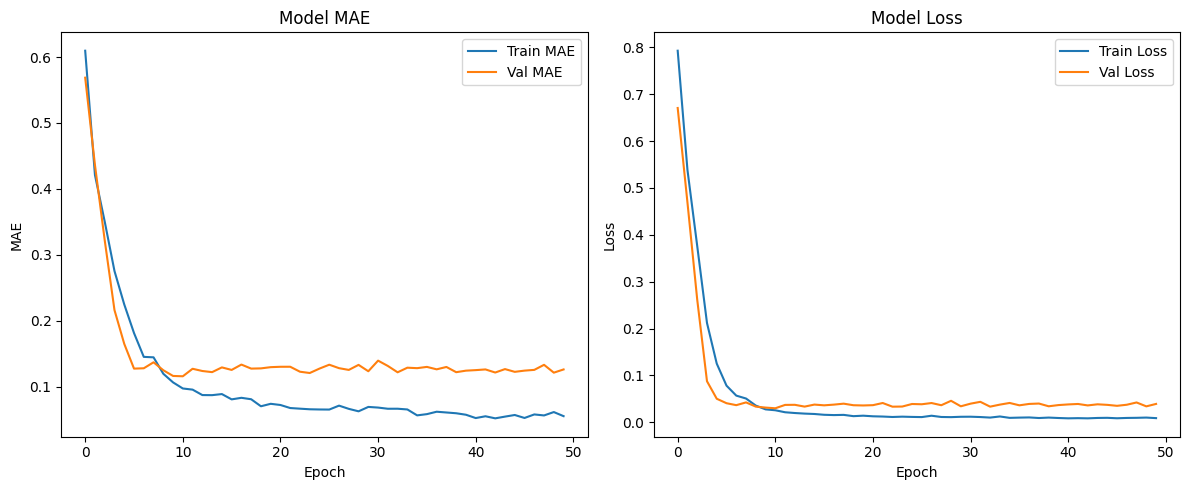

In [ ]:
# In this code fragment we plot the models mae and model loss
# MAE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Did you model overfit? Did it behave as you expected?

# Congratulations!

# You finished this exercise and learned how to train different machine learning models on regression and classification problems! 🥳

Feel free to play around with the code.

Try out different models like:
- Support Vector Machines: sklearn has implementations for classification and regression
- Random Forest Classifiers

You can also try and adapt the above Neural Network to the classification problem.

Or you could mask out some features and see how the models perform.